# Uber Rider Data Case Study

##  Project Overview

Uber is interested in predicting rider retention. To help explore this question, they have provided a sample dataset of a cohort of users.

![Uber](./images/uber.jpg)

## Dataset Description

- city: city this user signed up in
    - city_King's Landing: this user signed up in *King's Landing*
    - city_Winterfell: this user signed up in *Winterfell*
    - city_Astapor: this user signed up in *Astapor*
- phone: primary device for this user
    - phone_Android: primary device for this user is Android
    - phone_iPhone: primary device for this user is iPhone
    - phone_no_phone: primary device for this user is unknown
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup 
- avg_rating_by_driver: the rider’s average rating over all of their trips 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday
- churn: a user is regarded as churn if there is no trip made in last 30 days

## Load data and browse data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('data/churn.csv')

In [3]:
# Browse dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null int64
weekday_pct               50000 non-null float64
city_Astapor              50000 non-null float64
city_King's Landing       50000 non-null float64
city_Winterfell           50000 non-null float64
phone_Android             50000 non-null float64
phone_iPhone              50000 non-null float64
phone_no_phone            50000 non-null float64
churn                     50000 non-null int64
dtypes: float64(12), int64(3)
memory usage: 5.7 MB


In [4]:
# Show summary stats
df.describe()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,0.37708,60.926084,0.330680,0.202600,0.466720,0.300440,0.691640,0.007920,0.623920
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,0.48466,37.081503,0.470463,0.401941,0.498896,0.458454,0.461821,0.088642,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build Logistic Regression Model

### Define Features and Target

In [5]:
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone']
target = u'churn'

In [6]:
X = df[selected_features].values
y = df['churn'].values

In [7]:
X.shape

(50000, 14)

In [8]:
y

array([0, 1, 1, ..., 1, 1, 1])

### Fit a Logistic Regression model using sklearn

#### Let's Train-test split the data!

In [52]:
# import train test split function from sklearn
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

#### Now train the model

In [53]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
lr = LogisticRegression(C=100000, fit_intercept=True)

# Fit a model by providing X and y from training set
lr.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = lr.predict(X_train)

# Make predictions on test data
y_test_pred = lr.predict(X_test)

### Calculate the metric scores for the model

In [54]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [55]:
# Helper method to print metric scores
def print_results(y_true, y_pred):
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_true, y_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_true, y_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_true, y_pred)))

In [56]:
print("Training set scores:")
print_results(y_train, y_train_pred)

Training set scores:
Accuracy of the Logistic Regression is: 0.719515789474
Precision of the Logistic Regression is: 0.737406933457
Recall of the Logistic Regression is: 0.855172181187
f1-score of the Logistic Regression is: 0.791935408305


In [57]:
print("Test set scores:")
print_results(y_test, y_test_pred)

Test set scores:
Accuracy of the Logistic Regression is: 0.7072
Precision of the Logistic Regression is: 0.727780883175
Recall of the Logistic Regression is: 0.841628959276
f1-score of the Logistic Regression is: 0.780575539568


### Understanding the Estimated Coefficients

In [58]:
df_coeffs = pd.DataFrame(list(zip(selected_features, lr.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
8,city_Astapor,0.675604
11,phone_Android,0.429428
3,avg_surge,0.197389
10,city_Winterfell,0.160580
1,avg_rating_by_driver,0.146983
2,avg_rating_of_driver,0.121435
0,avg_dist,0.037133
13,phone_no_phone,0.004260
7,weekday_pct,0.000022
4,surge_pct,-0.004197


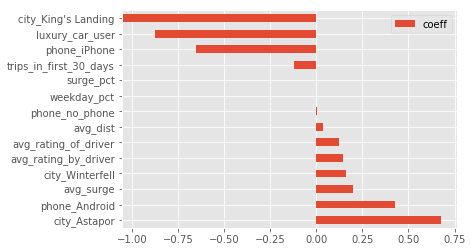

In [59]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### How to interpret coefficient?

***Recall: Increasing the value of $x_i$ by 1 increases the odds ratio by a factor of $e^{\beta_i}$***

Say, for a given user, assume he has a probability to churn at 50%, or in another word, the odd ratio is 1:1 = 1

In [60]:
default_OR = 1 # 50% chance to churn

If a coefficient is 0.2, then, if we increase the corresponding variable by 1 unit, the new odd ratio will be:

In [61]:
beta = 0.2
increase = np.exp(beta)
OR = default_OR * increase
OR

1.2214027581601699

Which is can be converted to chance to churn:

In [62]:
p = OR / (1 + OR)
p

0.54983399731247795

If a coefficient is -0.4, then, if we increase the corresponding variable by 1 unit, the new odd ratio will be:

In [63]:
beta = -0.4
increase = np.exp(beta) * 1
OR = default_OR * increase
OR

0.67032004603563933

Which is can be converted to chance to churn:

In [64]:
p = OR / (1 + OR)
p

0.401312339887548

### More Model Evaluation

#### Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [66]:
confusion_matrix(y_test, y_test_pred)

array([[ 466,  487],
       [ 245, 1302]])

In [67]:
# Helper method to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    '''
    Code from sklearn example.
    '''
    
    cm = confusion_matrix(y_true, y_pred)

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[ 8822  9029]
 [ 4294 25355]]


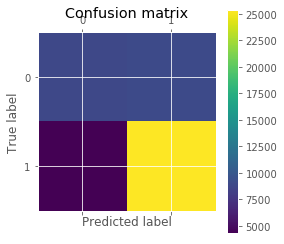

In [68]:
plot_confusion_matrix(y_train, y_train_pred)

[[ 466  487]
 [ 245 1302]]


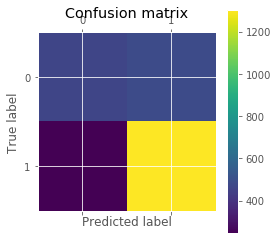

In [69]:
plot_confusion_matrix(y_test, y_test_pred)

#### AUC

In [70]:
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

Area Under Curve (AUC) of the Logistic Regression is: 0.665305560435


#### Classification report

In [71]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.66      0.49      0.56       953
          1       0.73      0.84      0.78      1547

avg / total       0.70      0.71      0.70      2500



#### Plot ROC curve

In [72]:
# Make predictions of the probability to be "positive"/"churn"/"1", as compared to "negative"/"not churn"/"0"
y_test_pred_proba = lr.predict_proba(X_test)[:,1]
y_test_pred_proba

array([ 0.44388589,  0.63825708,  0.73151444, ...,  0.47223798,
        0.74989331,  0.75751859])

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
fpr

array([ 0.        ,  0.00104932,  0.00104932,  0.00209864,  0.00209864,
        0.00314795,  0.00314795,  0.00419727,  0.00419727,  0.00524659,
        0.00524659,  0.00629591,  0.00629591,  0.00734523,  0.00734523,
        0.00839454,  0.00839454,  0.00944386,  0.00944386,  0.01049318,
        0.01049318,  0.0115425 ,  0.0115425 ,  0.01259182,  0.01259182,
        0.01364113,  0.01364113,  0.01469045,  0.01469045,  0.01678909,
        0.01678909,  0.01783841,  0.01783841,  0.01888772,  0.01888772,
        0.01993704,  0.01993704,  0.02098636,  0.02098636,  0.02203568,
        0.02203568,  0.02308499,  0.02308499,  0.02623295,  0.02623295,
        0.02728227,  0.02728227,  0.02833158,  0.02833158,  0.0293809 ,
        0.0293809 ,  0.03043022,  0.03043022,  0.03147954,  0.03147954,
        0.03252886,  0.03252886,  0.03357817,  0.03357817,  0.03462749,
        0.03462749,  0.03567681,  0.03567681,  0.03672613,  0.03672613,
        0.03777545,  0.03777545,  0.03882476,  0.03882476,  0.04

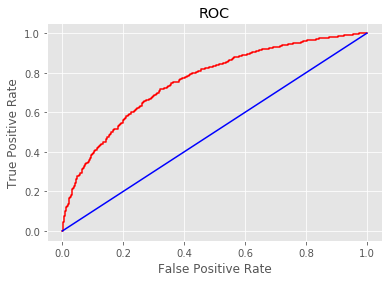

In [74]:
# plot TPR against FPR
plt.plot(fpr, tpr, color='red')

# plot 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='blue')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

plt.show()

## Cost-benefit Analysis - Profit Curve

#### Uber uses sign up coupon to attract new riders

![Signup Coupon](./images/uber_20_off_first_ride_coupon.png)

#### Uber also gives coupon to retain likely churning riders

![retention Coupon](./images/uber_10_off_coupon.png)

### Q: How do we leverage our Logistic Regression model with business value?
### A: Cost-benefit Analysis

#### Confusion matrix

|               |   Actual Yes   |   Actual No    |
| ------------- |:--------------:|:--------------:|
| Predicted Yes | True positive  | False positive |
| Predicted No  | False negative | True negative  |

#### Let's define our cost-benefit matrix

|               |   Actual Yes   |   Actual No    |
| ------------- |:--------------:|:--------------:|
| Predicted Yes |    gain 10     |    lose 10     |
| Predicted No  |     lose 5     |       0        |


#### Define cost-benefit matrix based on business input

In [87]:
costbenefit = np.array([[10,-10],
                        [5,0]]) # I am a numpy array, Fill Me In! 


In [100]:
from sklearn.metrics import confusion_matrix

def standard_confusion_matrix(y_true, y_predict):
    """Given y and predicted y, generate standard orientation
    
    Args:
    =====
    numpy array: y_true - array of true label
    numpy array: y_predict - array of predicted label
    
    Return:
    ======:
    numpy array: confusion matrix, 2x2 numpy array
    """
    [[tn,fp],[fn,tp]] = confusion_matrix(y_true, y_predict)
    return np.array([[tp, fp], [fn, tn]])

def profit_curve(cost_benefit_matrix, probabilities, y_true):
    """Given cost-benefit matrix, predicted probability, 
    and true label, calculate expected profit associated with 
    each threshold.
    
    Args:
    =====
    numpy array: cost_benefit_matrix, 2x2 array
    numpy array: probabilities - array of predicted probabilities
    numpy array: y_true - array of true label
    
    Return:
    ======:
    numpy array: threshold
    numpy array: profit
    """
    
    thresholds= sorted(probabilities, reverse = True)
    profits= []
    for threshold in thresholds:
        y_predict = probabilities > threshold
        confusion_mat = standard_confusion_matrix(y_true, y_predict)
        profits.append(np.sum(confusion_mat * cost_benefit_matrix)/float(len(y_true)))
    return thresholds, profits

def plot_profit_model(profits, label="Logistic Regression"):
    """Plot profits against pertentage of test instance
    """
    percentages = np.linspace(0, 100, len(profits))
    plt.plot(percentages, profits, label=label)
    plt.title("Profit Curve")
    plt.xlabel("Percentage of test instances (decreasing by score)")
    plt.ylabel("Profit")
    plt.legend(loc='best')
    plt.savefig('profit_curve.png')
    plt.show()
    
def find_best_threshold(thresholds, profits):
    """Find the best threshold that gives max profit
    
    Args:
    =====
    numpy array: thresholds - array of sorted threshold
    numpy array: profits - array of profits
    
    Return:
    ======:
    float: threshold that corresponds to max profit
    float: max profit
    """
    max_profits_ind = np.argmax(profits)
    max_thresholds = thresholds[max_profits_ind]
    max_profits = np.max(profits)
    return max_profits, max_thresholds

#### Train a model

In [89]:
lr = LogisticRegression(C=0.1, fit_intercept=True)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
# Make prediction on training data
y_train_pred = lr.predict(X_train)
print("Training score:")
print(classification_report(y_train, y_train_pred))

Training score:
             precision    recall  f1-score   support

          0       0.67      0.49      0.57     17851
          1       0.74      0.86      0.79     29649

avg / total       0.71      0.72      0.71     47500



In [91]:
# Make predictions on test data
y_test_pred = lr.predict(X_test)
print("Test score:")
print(classification_report(y_test, y_test_pred))

Test score:
             precision    recall  f1-score   support

          0       0.65      0.49      0.56       953
          1       0.73      0.84      0.78      1547

avg / total       0.70      0.71      0.70      2500



#### Plot profit curve 

In [101]:
# Make prediction on the probabilities
probabilities = lr.predict_proba(X_test)[:, 1]

# Calculate expected profits corresponding to different threshold
thresholds, profits = profit_curve(costbenefit, probabilities, y_test)


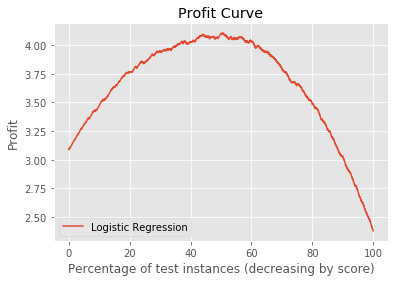

In [103]:
# Plot!
plot_profit_model(profits, label="Logistic Regression")

In [84]:
 max_profit, max_threshold = find_best_threshold(thresholds, profits)

#### Find the best threshold

In [85]:
print("The best threshold is {}, which gives a max profit of {}".format(max_threshold, max_profit))

The best threshold is 0.656794415802, which gives a max profit of 4.104


#### Make predictions with chosen threshold

In [86]:
y_test_pred = (lr.predict_proba(X_test)[:,1] >= max_threshold).astype(int)
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.56      0.74      0.64       953
          1       0.80      0.65      0.72      1547

avg / total       0.71      0.68      0.69      2500

